<a href="https://colab.research.google.com/github/davidfu0826/K-clustering-classifier/blob/master/course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# For downloading MNIST Zara fashion dataset
from tensorflow.keras.datasets import fashion_mnist

# For data visualization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Dimensionality reduction
from sklearn.decomposition import PCA

# Preprocessing
from tensorflow.keras.utils import to_categorical

# Machine learning model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model


In [0]:
# Loading images
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

label_to_article = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
    }


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# Size of the dataset (X, Y)
print ('Number of images and their sizes: ' + str(train_images.shape))

Number of images and their sizes: (60000, 28, 28)


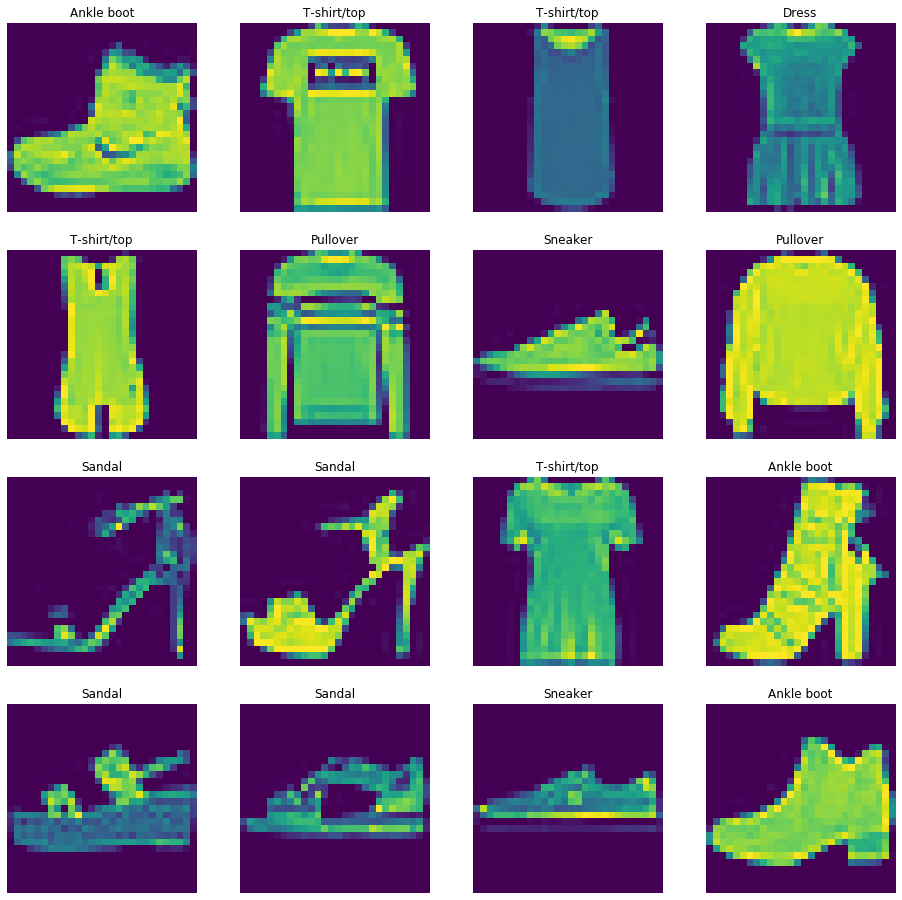

In [0]:
# Displaying images
fig, axs = plt.subplots(4, 4, figsize = (16, 16))
for i in range(16):
  image = train_images[i]
  grid_index = (i//4, i%4)
  axs[grid_index].imshow(image/255.)
  axs[grid_index].set_title(label_to_article[train_labels[i]])
  axs[grid_index].axis('off')
plt.show()

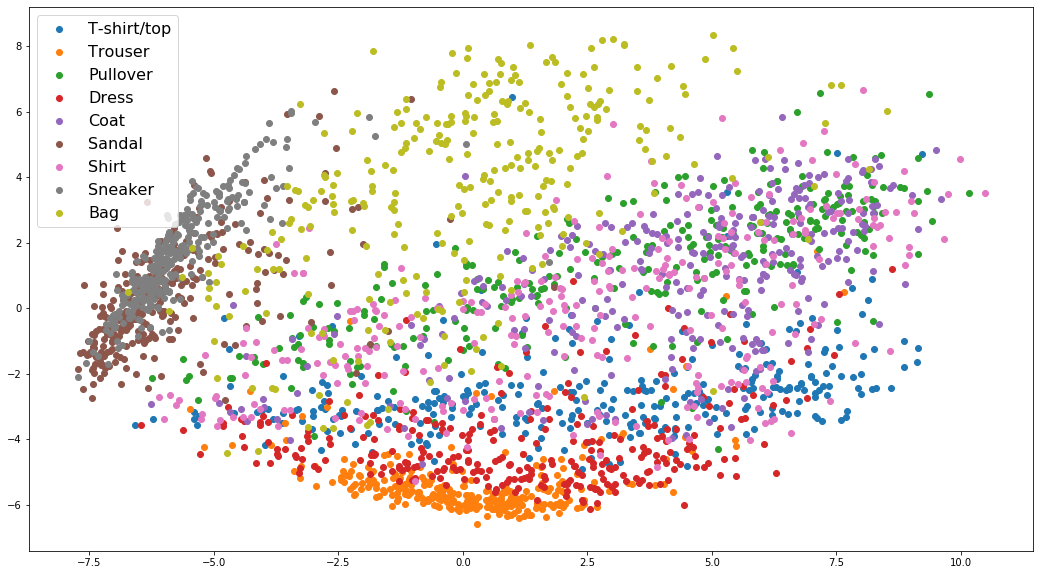

In [0]:
# Dimensionality reduction 
pca = PCA(n_components=2)
pca_train_images = pca.fit_transform(np.reshape(train_images/255., [-1, 28*28]))

# Colors for illustration
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

plt.figure(figsize=(18, 10))
for i in range(9):
  # Select a subset of the images
  indices = np.where(train_labels == i)[0][:300]

  # Display images in a 2D grid
  plt.scatter(pca_train_images[indices][:,0], pca_train_images[indices][:,1])#, c=colors[i])
plt.legend([label_to_article[i] for i in range(9)], prop={'size': 16})

In [0]:
#TODO: Feature discussion
# Talk about kernels and plot some, 
#show that they detect horizontal lines
# Plot a grid of all learned kernels


In [0]:
# Convolutions are the basic building stones of a convolutional neural network
# import the necessary packages
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2

In [0]:
def convolve(image, kernel):
	# grab the spatial dimensions of the image, along with
	# the spatial dimensions of the kernel
	(iH, iW) = image.shape[:2]
	(kH, kW) = kernel.shape[:2]

	# allocate memory for the output image, taking care to
	# "pad" the borders of the input image so the spatial
	# size (i.e., width and height) are not reduced
	pad = (kW - 1) // 2
	image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
		cv2.BORDER_REPLICATE)
	output = np.zeros((iH, iW), dtype="float32")

In [0]:
convolve(train_images, [[1, 1],[1, 1]])

AttributeError: ignored

In [0]:
# Keras expects 4D inputs, therefore we need to reshape our dataset from (-1, 28, 28) to (-1, 28, 28, 1)
X_train = np.reshape(train_images/255., [-1, 28, 28, 1]) 
X_test = np.reshape(test_images/255., [-1, 28, 28, 1]) 

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [0]:
inputs = Input(shape=(28, 28, 1))
x = Conv2D(64, (3,3), activation="relu")(inputs)
x = MaxPooling2D()(x)
x = Conv2D(64, (3,3), activation="relu")(inputs)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(64, activation="relu")(x)
outputs = Dense(10, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)

In [0]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
model.fit(X_train, y_train)

Train on 60000 samples
60000/60000 [==============================] - 48s 795us/sample - loss: 0.7182 - acc: 0.7548


In [0]:
y_preds = model.predict(X_test)

In [0]:
data = confusion_matrix(y_test.argmax(axis=1), y_preds.argmax(axis=1))

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

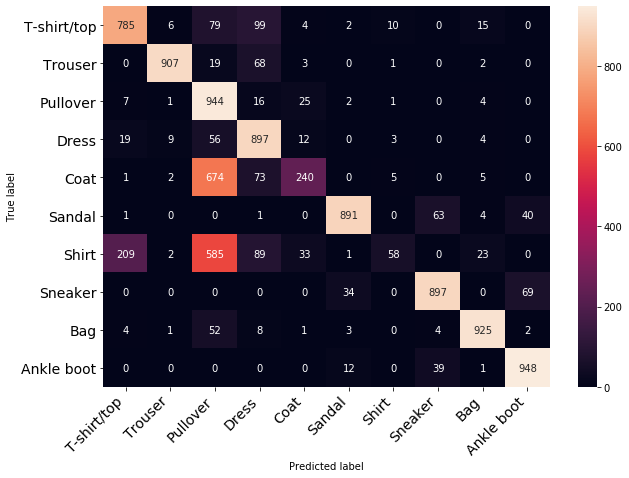

In [0]:
print_confusion_matrix(data, class_names=label_to_article.values());